# Data Analysis

<h3> <b>Objectives:<b> <h3/>

* Analyze and Visualize Data

* Find notable patterns

### *We will try to find out anwers to following question in the analysis process.*

1. **Causlties**

  a. Total Casualties in each category:
    * Leaders killed.
    * Militants killed.
    * Civilian Casualties.
    * Unknown Casualites. 
  
  b. To which category, most casualties belong? 

  c. Casualties by Region. 
  
  d. Casualties by year. 
  
  e. Casualties by Organization. 

2. **Strikes**
  
  a. Most targeted Regions.
 
  b. Strikes by Year.


###  Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###  Load Data

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Data Science/drone-attacks-data-cleaned.csv',index_col=[0] )
df['date'] = pd.to_datetime(df['date'], format="%y-%m-%d",infer_datetime_format=True)

###  Explore Data

In [ ]:
df.shape

(414, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   strikes                414 non-null    int64         
 1   date                   414 non-null    datetime64[ns]
 2   village                414 non-null    object        
 3   region                 414 non-null    object        
 4   year                   414 non-null    int64         
 5   leaders-killed         414 non-null    int64         
 6   leader-names           414 non-null    object        
 7   leader-description     414 non-null    object        
 8   militants-killed-low   414 non-null    int64         
 9   militants-killed-high  414 non-null    int64         
 10  militants-killed-avg   414 non-null    int64         
 11  unknown-killed-low     414 non-null    int64         
 12  unknown-killed-high    414 non-null    int64         
 13  unkno

In [ ]:
df.head()

,strikes,date,village,region,year,leaders-killed,leader-names,leader-description,militants-killed-low,militants-killed-high,...,total-killed-low,total-killed-high,total-killed-avg,president (US),target-type,target-organization,target-group,target-latitude,target-longitude,province
0,1,2004-06-19,wana,south waziristan,2004,1,nek muhammad,"commander, taliban",1,1,...,7,7,7,bush,house,taliban,1. taliban,32.307446,69.565430,federally administered tribal areas
1,1,2005-05-08,"toorikhel, mirali",north waziristan,2005,1,haitham al-yemeni,"explosives expert, al qaeda",2,2,...,2,2,2,bush,unclear,al-qaeda,3. al-qaeda,32.987644,70.261345,federally administered tribal areas
2,1,2005-11-05,haisori,north waziristan,2005,0,none,none,0,0,...,8,8,8,bush,house,al-qaeda,3. al-qaeda,33.010391,70.043335,federally administered tribal areas
3,1,2005-12-01,patasi adda,north waziristan,2005,1,abu hamza rabia,"senior commander, al qaeda",3,3,...,5,5,5,bush,unclear,al-qaeda,3. al-qaeda,32.096860,70.265700,federally administered tribal areas
4,1,2006-01-06,damadola,bajaur,2006,0,none,none,0,0,...,8,18,13,bush,gathering,al-qaeda,3. al-qaeda,34.801682,71.472588,federally administered tribal areas


# 1) Casualties

## a. Total Casualties in each category.

###  Leaders killed

In [ ]:
total_leaders_killed = df['leaders-killed'].sum()

print(f"Total leaders killed: {total_leaders_killed}")

Total leaders killed: 95


###  Millitants killed

In [ ]:
total_millitants_killed = str(df['militants-killed-low'].sum()) + " to " + str(df['militants-killed-high'].sum())
avg_millitants_killed = df['militants-killed-avg'].sum()

print(f"Total militants killed: {total_millitants_killed}")
print(f"Average: {avg_millitants_killed}")

Total militants killed: 1910 to 3071
Average: 2403


###  Civilian Casualties

In [ ]:
total_civilian_killed = str(df['civilians-killed-low'].sum()) + " to " + str(df['civilians-killed-high'].sum())
avg_civilian_killed = df['civilians-killed-avg'].sum()

print(f"Total Civilian Casualties: {total_civilian_killed}")
print(f"Average: {avg_civilian_killed}")

Total Civilian Casualties: 245 to 303
Average: 269


###  Unknown Casualties

In [ ]:
total_unknown_killed = str(df['unknown-killed-low'].sum()) + " to " + str(df['unknown-killed-high'].sum())
avg_unknown_killed = df['unknown-killed-avg'].sum()

print(f"Total Unknown Casualties: {total_unknown_killed}")
print(f"Average: {avg_unknown_killed}")

Total Unknown Casualties: 211 to 328
Average: 263


###  Total Casualties

In [ ]:
total_casualties = str(df['total-killed-low'].sum()) + " to " + str(df['total-killed-high'].sum())
avg_total_casualties = df['total-killed-avg'].sum()

print(f"Total Casualties: {total_casualties}")
print(f"Average: {avg_total_casualties}")

Total Casualties: 2366 to 3702
Average: 2940


## b. To which category, most casualties belong? 

Using Pie chart to show percentage of casualties in each category.

In [ ]:
df_casualites = df[['leaders-killed', 'militants-killed-avg', 'civilians-killed-avg', 'unknown-killed-avg']]
df_casualites.rename(columns={'leaders-killed':'Leaders', 'militants-killed-avg':'Millitants', 'civilians-killed-avg':'Civilians', 'unknown-killed-avg':'Unknown'},inplace=True)
casualties_by_category = dict(((pd.DataFrame(df_casualites.sum())).transpose()).loc[0])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
import operator
casualties_by_category = dict( sorted(casualties_by_category.items(), key=operator.itemgetter(1),reverse=True))

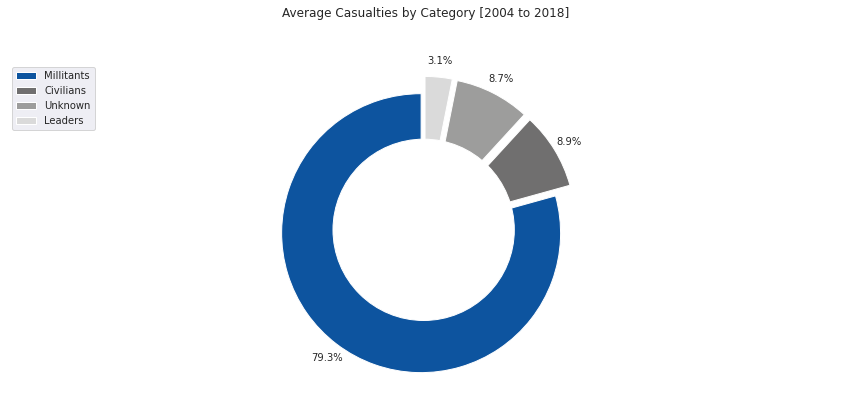

In [ ]:
min_year, max_year = df['year'].min(), df['year'].max()
colors_list, explode_list = ['#0D549F', '#706F6F','#9D9D9C', '#DADADA'], [0.03, 0.1, 0.1, 0.1] 

plt.figure(figsize=(15, 6))

plt.pie(casualties_by_category.values(), labels=None, colors=colors_list,  autopct='%1.1f%%', startangle=90, pctdistance=1.12,explode = explode_list)

centre_circle = plt.Circle((0,0),0.65,color='white', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title(f'Average Casualties by Category [{min_year} to {max_year}]', y=1.12) 

plt.axis('equal') 
plt.legend(labels=casualties_by_category, loc='upper left') 

plt.show()

## c. Casualties by Region.

In [ ]:
df_region = df
df_region = df_region.groupby('region', axis=0).sum()

df_region.sort_values(by="total-killed-avg",inplace=True,ascending=False)

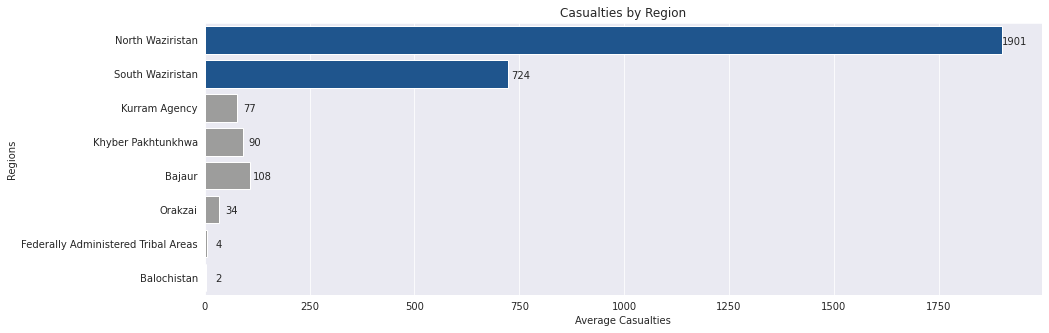

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Casualties by Region')

colors_list = ['#0D549F' if avg > 300 else '#9D9D9C' for avg in df_region['total-killed-avg']]

plots = sns.barplot(x = 'total-killed-avg', y = [region.title() for region in list(df_region.index)], data = df_region, palette = colors_list)

for p in plots.patches:
    width, height = p.get_width(), p.get_height()
    plt.text(30+width, p.get_y()+0.55*height, int(width), ha='center', va='center')
 
plt.xlabel('Average Casualties')
plt.ylabel('Regions')
plt.show()

## c. Casualties by Year.

In [ ]:
df_year = df
df_year = df_year.groupby('year', axis=0).sum()

df_year.sort_values(by="total-killed-avg",inplace=True,ascending=False)
df_year.rename(columns = {'militants-killed-avg':'Millitants', 'unknown-killed-avg':'Unknown','civilians-killed-avg':'Civilians','leaders-killed':'Leaders'}, inplace = True)

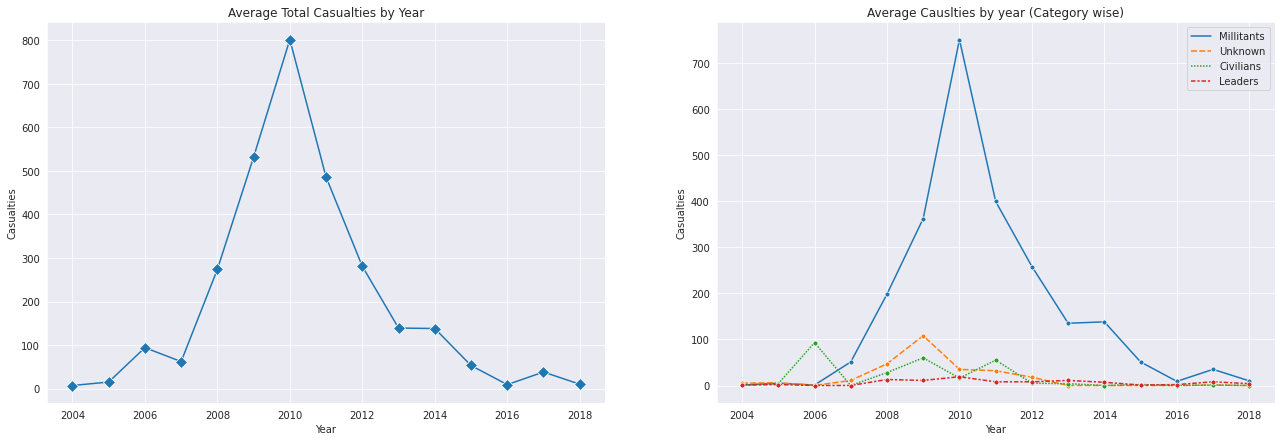

In [ ]:
fig = plt.figure(figsize=(22,7)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
sns.lineplot(y = 'total-killed-avg', x = df_year.index, data = df_year,marker="D", markersize=8, ax=ax0)
ax0.set_title('Average Total Casualties by Year')
ax0.set_xlabel('Year')
ax0.set_ylabel('Casualties')

# Subplot 2: Line plot
sns.lineplot( data = df_year[['Millitants', 'Unknown','Civilians','Leaders']],marker=".", markersize=10,ax=ax1) 
ax1.set_title ('Average Causlties by year (Category wise)')
ax1.set_ylabel('Casualties')
ax1.set_xlabel('Year')

plt.show()

There's a spike in casulties from 2007 and ownwards. Let's explore why?

Have look at number of strikes each year.

In [ ]:
df_year[['strikes','total-killed-avg']].sort_values(by='year').transpose()

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
strikes,1,3,2,4,36,54,122,70,48,26,22,10,3,8,5
total-killed-avg,7,15,94,62,274,532,802,486,281,139,138,53,9,38,10


It shows that from 2007 ownwards number of striked per year increased which resulted in increase of yearly casualteis. We'll visualize it in next Strikes section.

## e. Casualties by Organization. 

In [ ]:
df_org = df
df_org = df_org.groupby('target-organization', axis=0).sum()
df_org['organization-killed-avg'] = df_org['militants-killed-avg'] + df_org['leaders-killed']

df_org.sort_values(by="organization-killed-avg",inplace=True,ascending=False)

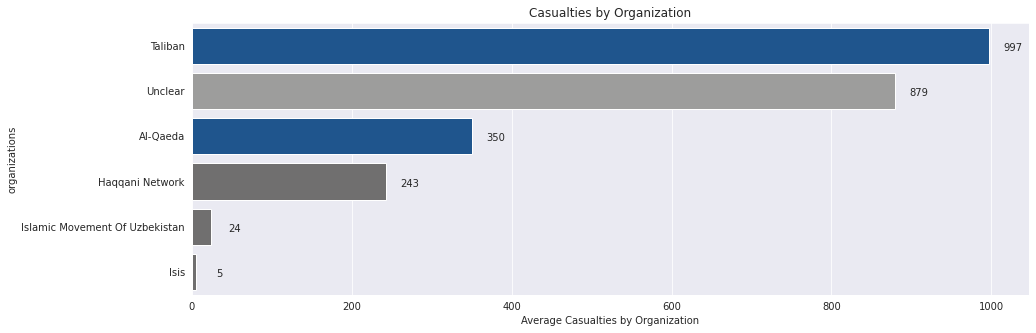

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Casualties by Organization')

colors_list = ['#0D549F' if (avg == 997 or avg == 350) else '#706F6F' for avg in df_org['organization-killed-avg']]
colors_list[1] = '#9D9D9C'

plots = sns.barplot(x = 'organization-killed-avg', y = [org.title() for org in list(df_org.index)], data = df_org, palette = colors_list)

for p in plots.patches:
    width, height = p.get_width(), p.get_height()
    plt.text(30+width, p.get_y()+0.55*height, int(width), ha='center', va='center')
 
plt.xlabel('Average Casualties by Organization')
plt.ylabel('organizations')
plt.show()

The most casualteis belong to  **Taliban** and **Al-Qaeda**. While there's huge number which is **unknown**. 

# 2) Strikes

### a. Most targeted Regions.

In [ ]:
df_region.sort_values(by="strikes",inplace=True,ascending=False)
df_region2 = df_region[:2].copy()

sum = pd.DataFrame(df_region.iloc[2:].sum())
df_region2 = df_region2.append(sum.transpose())
df_region2.astype(int)

indexes = [index if strikes > 80 else 'others' for index,strikes in zip(df_region2.index, df_region2['strikes']) ]
indexes = pd.Index(indexes)

df_region2.set_index(indexes,inplace=True)

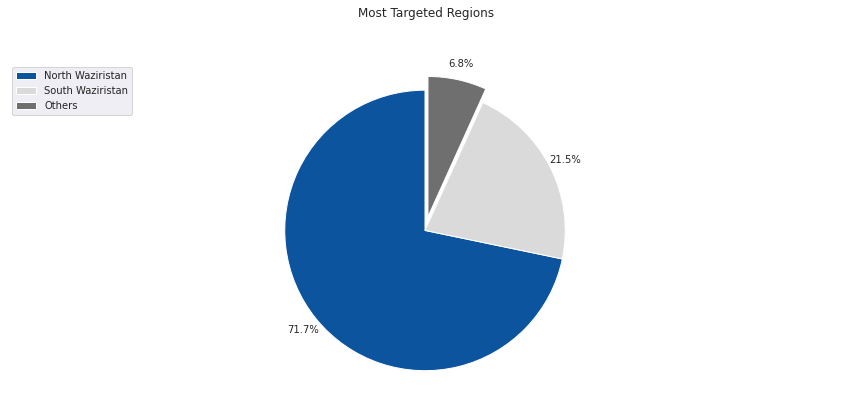

In [ ]:
colors_list = ['#0D549F', '#DADADA', '#706F6F']
explode_list = [0, 0, 0.1] 

plt.figure(figsize=(15, 6))

plt.pie(df_region2['strikes'].values, labels=None, colors=colors_list,  autopct='%1.1f%%', startangle=90, pctdistance=1.12,explode = explode_list )

plt.title('Most Targeted Regions', y=1.12) 

plt.axis('equal') 
plt.legend(labels=[region.title() for region in list(df_region2['strikes'].index)], loc='upper left') 

plt.show()

The plot shows **North Wairistan** and **South Waziristan** were the regions were most targeted regions.

### b. Strikes by Year.

In [ ]:
df_yearly_strikes = df[['year','strikes']]

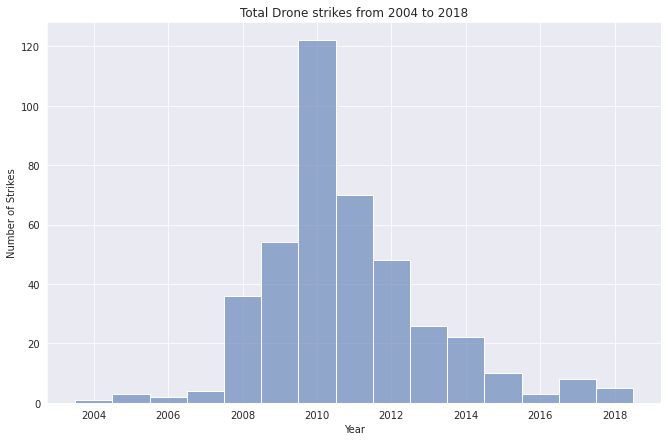

In [ ]:
plt.figure(figsize=(11, 7))

sns.histplot(df_yearly_strikes['year'], bins=14, discrete=True, color='#7390BF', edgecolor='#FFFFFF')

plt.title('Total Drone strikes from 2004 to 2018')
plt.xlabel('Year')
plt.ylabel('Number of Strikes')

plt.show()

The pattern of yearly strikes is almost symmetrical to yearly casualties.